In [ ]:
#1. IMPORT SAMPLE LINEAR REGRESSION DATA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Problem 1**

<Axes: xlabel='Voltage', ylabel='Current'>

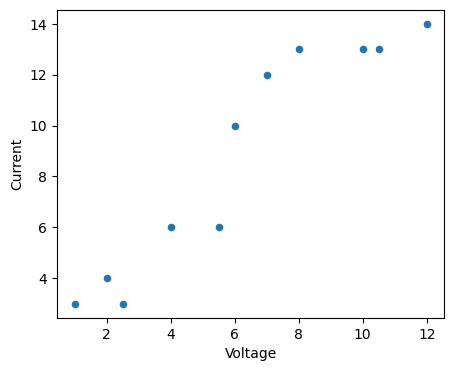

In [ ]:
indata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/linear_test.txt")
indata.plot(kind="scatter", x="Voltage",y="Current",figsize=(5, 4))

In [ ]:
#2. FIT LINEAR MODEL
import sklearn.linear_model
model_linear = sklearn.linear_model.LinearRegression()

In [ ]:
x = np.c_[indata["Voltage"]]
y = np.c_[indata["Current"]]
model_linear.fit(x,y)

LinearRegression()

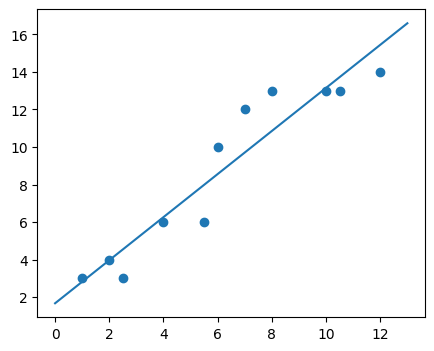

In [ ]:
Xf = np.linspace(0, 13, 100).reshape(100,1)
plt.figure(figsize=(5,4))
plt.plot(Xf, model_linear.predict(Xf))
plt.scatter(x,y)

In [ ]:
#2. FIT NEIGHBORS MODEL (INSTANCE-BASED)
import sklearn.neighbors
model_kneighbor = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3, p=2)
x = np.c_[indata["Voltage"]]
y = np.c_[indata["Current"]]
model_kneighbor.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

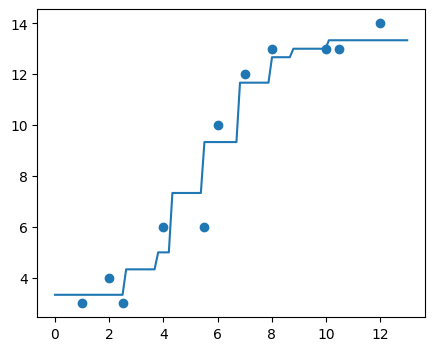

In [ ]:
Xf = np.linspace(0, 13, 100).reshape(100,1)
plt.figure(figsize=(5,4))
plt.plot(Xf, model_kneighbor.predict(Xf))
plt.scatter(x,y)

In [ ]:
# Calculate MSE for both models

from sklearn.metrics import mean_squared_error
y_true = y
y_pred_linear = model_linear.predict(x)
y_pred_kneighbor = model_kneighbor.predict(x)
linear_mse = mean_squared_error(y_true, y_pred_linear)
kneighbor_mse = mean_squared_error(y_true, y_pred_kneighbor)
print("Linear Regression MSE:", linear_mse)
print("KNeighborsRegressor MSE:", kneighbor_mse)


Linear Regression MSE: 1.908675166297118
KNeighborsRegressor MSE: 1.4242424242424245


The MSE for the k-neighbor model is smaller, as this model prioritizes the local property rather than the global one.

In [ ]:
matplotlib._get_version

# **Problem 2**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/hw1_data.txt", sep='\t')
data.rename(columns={'feature 1': 'feature_1', 'feature 2': 'feature_2'}, inplace=True)

In [ ]:
data

,feature_1,feature_2,label
0,1,1,6.959249
1,1,4,10.035060
2,3,3,10.815027
3,5,3,12.258169
4,6,4,13.477990
5,4,2,10.058727
6,3,6,12.942495
7,2,2,8.213977
8,1,7,12.966942
9,3,2,8.992583


In [ ]:
model_linear2 = sklearn.linear_model.LinearRegression()

In [ ]:
model_linear2.fit(data[['feature_1', 'feature_2']].values, data['label'].values)

LinearRegression()

In [ ]:
print(f'''The coefficients are
a1 = {model_linear2.coef_[0]}
a2 = {model_linear2.coef_[1]}
b = {model_linear2.intercept_}''')


The coefficients are 
a1 = 0.7904768066168855
a2 = 1.0201998357917743
b = 4.970084136007969


Visualization

In [ ]:
xx, yy = np.meshgrid(np.arange(data.feature_1.min()-1, data.feature_1.max()+1, 0.1),
                     np.arange(data.feature_2.min()-1, data.feature_2.max()+1, 0.1))

# Predict values for the meshgrid
Z = model_linear2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

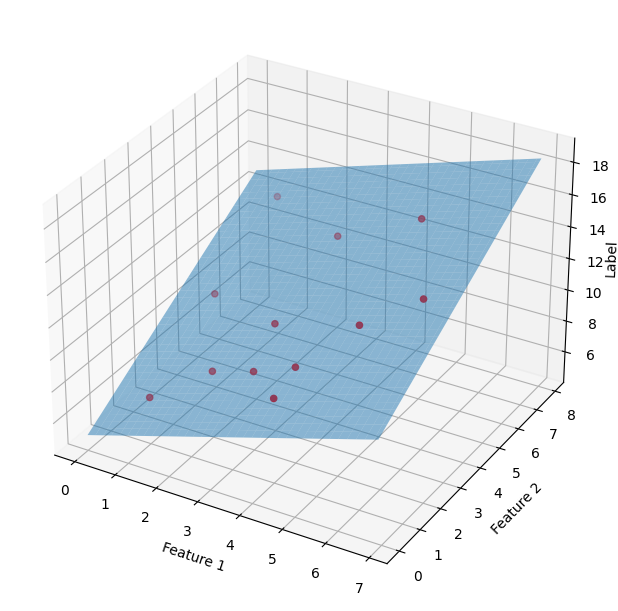

In [ ]:
# Plot the data and the fit
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection='3d'), layout='constrained')

ax.scatter(data.feature_1, data.feature_2, data.label, c='r', marker='o')
ax.plot_surface(xx, yy, Z, alpha=0.5)

ax.set(xlabel='Feature 1', ylabel='Feature 2', zlabel='Label')
ax.zaxis.labelpad=-2

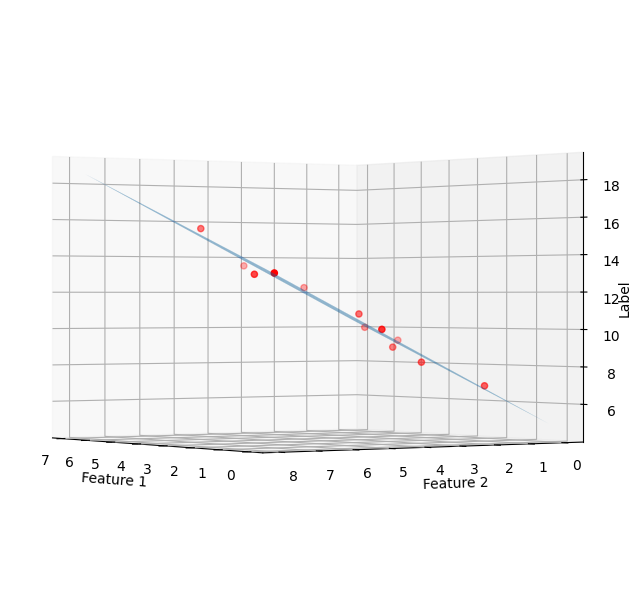

In [ ]:
# Adjust the POV for a better visualization
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection='3d'), layout='constrained')
ax.view_init(elev=0, azim=145)

ax.scatter(data.feature_1, data.feature_2, data.label, c='r', marker='o')
ax.plot_surface(xx, yy, Z, alpha=0.5)

ax.set(xlabel='Feature 1', ylabel='Feature 2', zlabel='Label')
ax.zaxis.labelpad=-4